#3.1 Part A: Implementing Convolutional Neural Network

#3.1.1 Data Understanding, Analysis, Visualization and Cleaning

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Imports
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

# Set dataset base directory
base_dir = "/content/drive/MyDrive/Facial Expression"
splits = ['train', 'test', 'validation']
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [ ]:
import os

def count_images_in_folder(base_path):
    #don't run
    """
    Count the number of image files in each expression folder for train, test, and validation splits.

        base_path (str): Base directory path containing 'train', 'test', and 'validation' subfolders.
    """
    results = {}
    for split in ['train', 'test', 'validation']:
        split_path = os.path.join(base_path, split)
        expression_counts = {}

        if not os.path.exists(split_path):
            print(f"[Warning] {split_path} does not exist.")
            continue

        try:
            for entry in sorted(os.scandir(split_path), key=lambda e: e.name):
                if entry.is_dir():
                    image_count = sum(
                        1 for f in os.scandir(entry.path)
                        if f.is_file() and f.name.lower().endswith(('.png', '.jpg', '.jpeg'))
                    )
                    expression_counts[entry.name] = image_count
        except Exception as e:
            print(f"[Error] Failed to scan directory {split_path}: {e}")

        results[split] = expression_counts
    return results

# Set the dataset directory
dataset_path = '/content/drive/MyDrive/Facial Expression'

# Count images
image_counts = count_images_in_folder(dataset_path)

# Print results
for split in ['train', 'test', 'validation']:
    print(f"\n--- {split.upper()} SET ---")
    expressions = image_counts.get(split, {})
    for expression, count in expressions.items():
        print(f"{expression}: {count}")



--- TRAIN SET ---
angry: 3693
disgust: 336
fear: 3803
happy: 6864
neutral: 4682
sad: 4638
surprise: 2905

--- TEST SET ---
angry: 300
disgust: 100
fear: 300
happy: 300
neutral: 300
sad: 300
surprise: 300

--- VALIDATION SET ---
angry: 960
disgust: 111
fear: 1018
happy: 1825
neutral: 1216
sad: 1139
surprise: 797


In [ ]:
import os
import random
#do not run
splits = ['train', 'test', 'validation']
remove_class = 'disgust'
target_count = 2000

# 1. Remove the "disgust" class from all splits
def remove_class_folders(base_dir, splits, class_name):
    for split in splits:
        class_path = os.path.join(base_dir, split, class_name)
        if os.path.exists(class_path):
            print(f"Removing folder: {class_path}")
            for file in os.listdir(class_path):
                file_path = os.path.join(class_path, file)
                os.remove(file_path)
            os.rmdir(class_path)
        else:
            print(f"Folder not found: {class_path}")

# 2. Reduce all classes in the train set to target_count images
def reduce_all_classes_to_target(base_dir, split, target):
    split_path = os.path.join(base_dir, split)
    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if os.path.isdir(class_path):
            images = [
                f for f in os.listdir(class_path)
                if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))
            ]

            if len(images) > target:
                to_remove = len(images) - target
                images_to_remove = random.sample(images, to_remove)
                for img in images_to_remove:
                    os.remove(os.path.join(class_path, img))
                print(f"Reduced '{class_name}' from {len(images)} to {target} images.")
            else:
                print(f"'{class_name}' has {len(images)} images — no need to reduce.")

# Run operations
remove_class_folders(base_dir, splits, remove_class)
reduce_all_classes_to_target(base_dir, 'train', target_count)


Removing folder: E:/facial expression classification/Facial Expression\train\disgust
Removing folder: E:/facial expression classification/Facial Expression\test\disgust
Removing folder: E:/facial expression classification/Facial Expression\validation\disgust
Reduced 'angry' from 3693 to 2000 images.
Reduced 'fear' from 3803 to 2000 images.
Reduced 'happy' from 6864 to 2000 images.
Reduced 'neutral' from 4682 to 2000 images.
Reduced 'sad' from 4638 to 2000 images.
Reduced 'surprise' from 2905 to 2000 images.



--- TRAIN SET ---
angry: 1996
fear: 1997
happy: 1997
neutral: 1999
sad: 1998
surprise: 1997

--- TEST SET ---
angry: 300
fear: 300
happy: 300
neutral: 300
sad: 300
surprise: 300

--- VALIDATION SET ---
angry: 960
fear: 1018
happy: 1825
neutral: 1216
sad: 1139
surprise: 797


<ipython-input-3-9b221da55bf4>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(data.keys()), y=list(data.values()), palette="Set3")


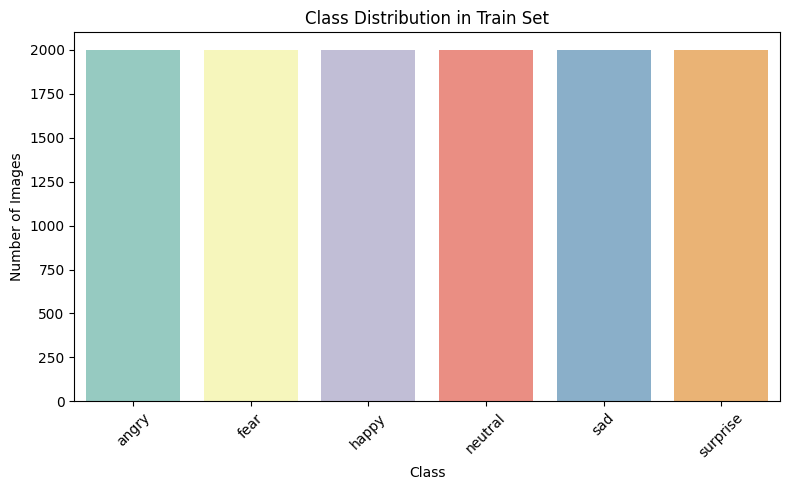

<ipython-input-3-9b221da55bf4>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(data.keys()), y=list(data.values()), palette="Set3")


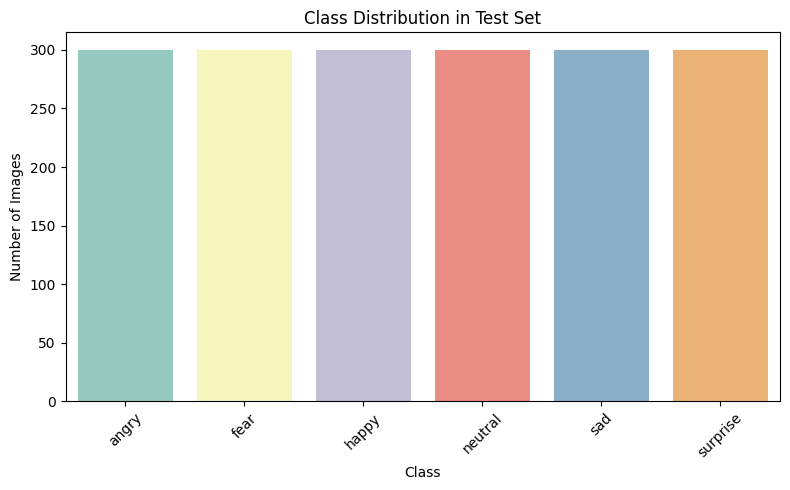

<ipython-input-3-9b221da55bf4>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(data.keys()), y=list(data.values()), palette="Set3")


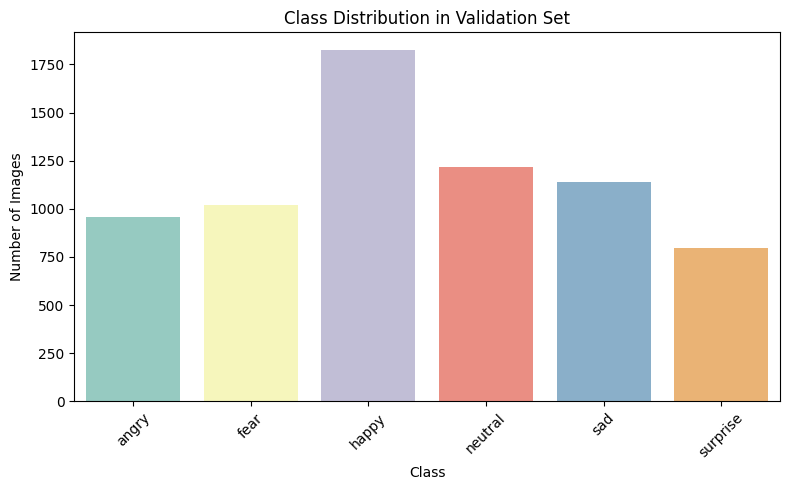

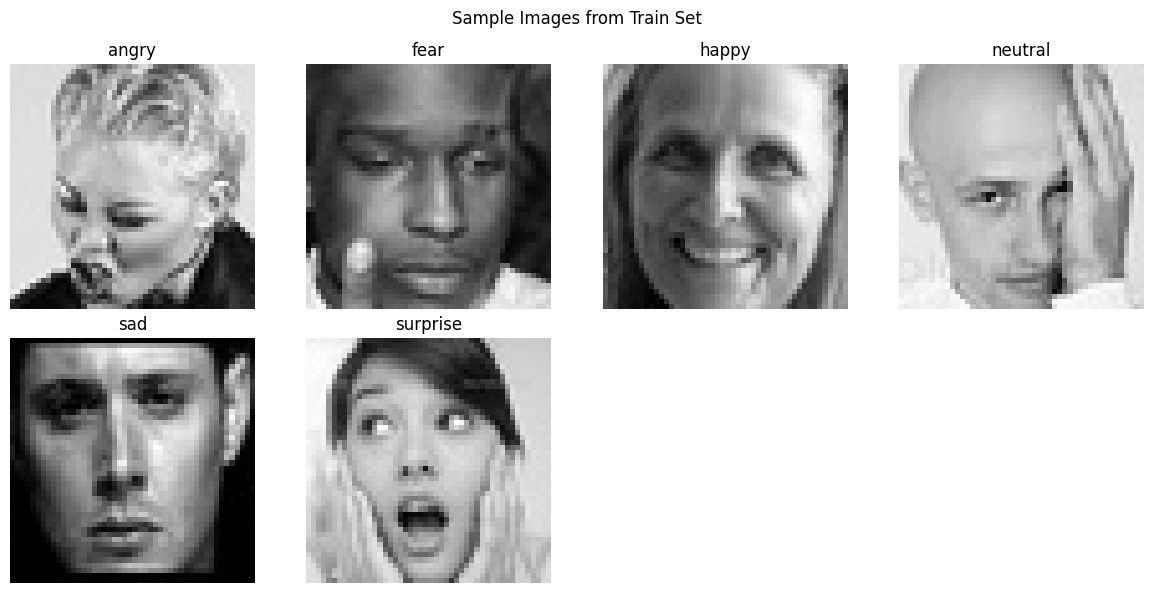

In [3]:
# Imports
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

# Set dataset base directory
base_dir = "/content/drive/MyDrive/Facial Expression"
splits = ['train', 'test', 'validation']
classes = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']  # Removed 'disgust'

# Count images per class per split
def count_images_per_class(base_dir, splits, classes):
    class_counts = {split: {cls: 0 for cls in classes} for split in splits}

    for split in splits:
        for cls in classes:
            cls_path = os.path.join(base_dir, split, cls)
            if os.path.exists(cls_path):
                class_counts[split][cls] = len(os.listdir(cls_path))

    return class_counts

# Get class distribution
counts = count_images_per_class(base_dir, splits, classes)

# Print counts
for split in splits:
    print(f"\n--- {split.upper()} SET ---")
    for cls in classes:
        print(f"{cls}: {counts[split][cls]}")

# Plot bar charts
def plot_distribution(counts, split):
    data = counts[split]
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(data.keys()), y=list(data.values()), palette="Set3")
    plt.title(f'Class Distribution in {split.capitalize()} Set')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot for each split
for split in splits:
    plot_distribution(counts, split)

# Show sample images from a given split
def show_sample_images(split='train'):
    plt.figure(figsize=(12, 6))
    for i, cls in enumerate(classes):
        cls_dir = os.path.join(base_dir, split, cls)
        if os.path.exists(cls_dir) and len(os.listdir(cls_dir)) > 0:
            img_name = random.choice(os.listdir(cls_dir))
            img_path = os.path.join(cls_dir, img_name)
            img = Image.open(img_path)
            plt.subplot(2, 4, i + 1)
            plt.imshow(img, cmap='gray')
            plt.title(cls)
            plt.axis('off')
    plt.suptitle(f'Sample Images from {split.capitalize()} Set')
    plt.tight_layout()
    plt.show()

# Show samples from training set
show_sample_images('train')

In [4]:
import os
from PIL import Image

# path to dataset
data_dirs = {
    'train': '/content/drive/MyDrive/Facial Expression/train',
    'test': '/content/drive/MyDrive/Facial Expression/test',
    'val': '/content/drive/MyDrive/Facial Expression/validation',
}

corrupted_files = []

# Check for corrupted images
for split, data_dir in data_dirs.items():
    for class_dir in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_dir)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                if filename.lower().endswith(('png', 'jpg', 'jpeg', 'bmp')):
                    try:
                        with Image.open(img_path) as img:
                            img.verify()  # verify the image
                    except Exception as e:
                        print(f"Corrupted file detected and deleted: {img_path}")
                        corrupted_files.append(img_path)
                        os.remove(img_path)

if not corrupted_files:
    print("No corrupted files found.")
else:
    print(f"Total corrupted files removed: {len(corrupted_files)}")


No corrupted files found.


In [5]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to your dataset
train_dir = '/content/drive/MyDrive/Facial Expression/train'
test_dir = '/content/drive/MyDrive/Facial Expression/test'
val_dir = '/content/drive/MyDrive/Facial Expression/validation'

# Parameters
img_height = 224  #for transfer learning
img_width = 224
batch_size = 32
num_classes = 6  # angry, fear, happy, neutral, sad, surprise

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# just rescaling
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Data loaders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Print class mapping
print("Class indices:", train_generator.class_indices)


Found 11984 images belonging to 6 classes.
Found 6955 images belonging to 6 classes.
Found 1800 images belonging to 6 classes.
Class indices: {'angry': 0, 'fear': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprise': 5}


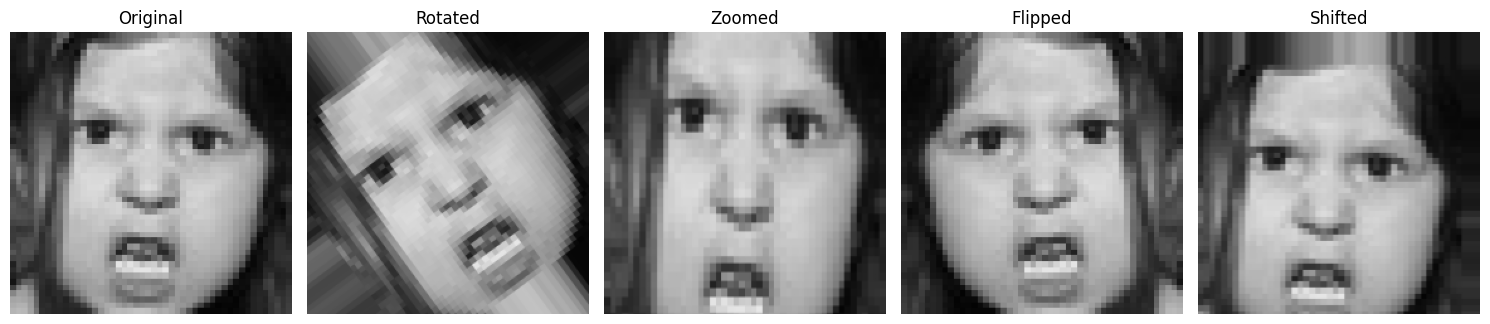

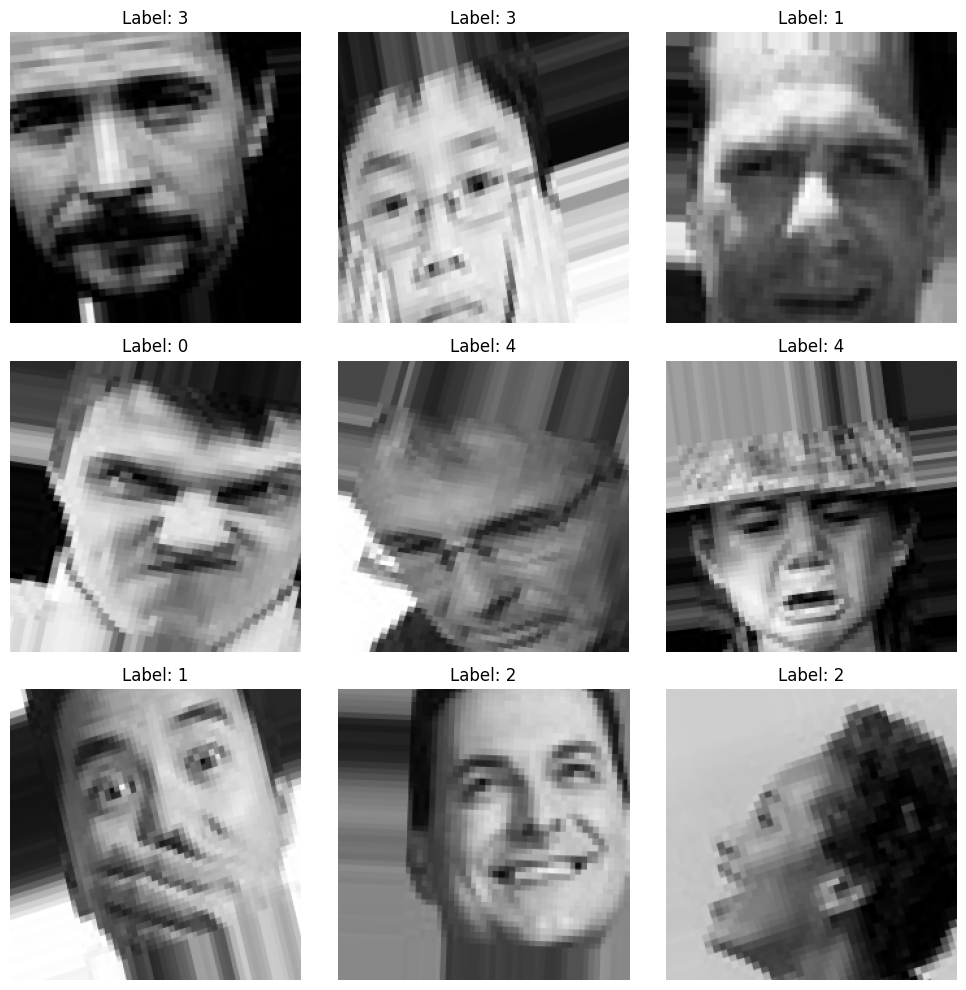

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np

# --- Part 1: Show specific augmentations on a single image ---
# Load one image from training set
img_path = train_generator.filepaths[0]  # First image
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, 0)  # Add batch dimension

# Define individual augmentation types
augmentation_types = {
    "Original": ImageDataGenerator(rescale=1./255),
    "Rotated": ImageDataGenerator(rescale=1./255, rotation_range=40),
    "Zoomed": ImageDataGenerator(rescale=1./255, zoom_range=0.5),
    "Flipped": ImageDataGenerator(rescale=1./255, horizontal_flip=True),
    "Shifted": ImageDataGenerator(rescale=1./255, width_shift_range=0.3, height_shift_range=0.3)
}

# Plot each augmentation type
plt.figure(figsize=(15, 5))
for i, (name, gen) in enumerate(augmentation_types.items()):
    aug_img = next(gen.flow(img_array, batch_size=1))[0]
    plt.subplot(1, len(augmentation_types), i + 1)
    plt.imshow(aug_img)
    plt.title(name)
    plt.axis("off")

plt.tight_layout()
plt.show()

#Show random augmentations from train_generator
# Get a batch of randomly augmented images and labels
images, labels = next(train_generator)

# Show the first 9 images from the batch
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {np.argmax(labels[i])}")
    plt.axis("off")

plt.tight_layout()
plt.show()


1. What does the dataset represent? Provide a brief description.
- This dataset includes face images showing different emotions like sad,angry, fear, surprise, neutral, and happy. All images are placed into one of these emotion categories.

2. How many total images are in the dataset?
- There are 20,739 images in total.
*   Training Set: 11,984 images
*   Validation Set: 6955 images
*   Test Set: 1800 images


3. What is the distribution of images across different classes?

- TRAIN SET: angry: 1996,fear: 1997,happy: 1997,neutral: 1999,sad: 1998,
  surprise:1997

- TEST SET : angry: 300,fear: 300,happy: 300,neutral: 300,sad: 300,surprise: 300

- VALIDATION SET: angry: 960,fear: 1018,happy: 1825,neutral: 1216,sad: 1139,  
  surprise: 797


4. How is the dataset split into training and validation sets? Justify your choice.
- The dataset in divided into 3 parts:
  Training: 57.8%,
  Validation: 33.5%,
  Test: 8.7%
  This is done to teach model patterns, tune hyperparameter and prevent overfitting and evaluate final model performance.

5. What preprocessing techniques (e.g., resizing, normalization) were applied?
*   Normalization: We scaled all pixel values to be between 0 and 1 by dividing them by 255.
*   Augmentation (in training only): We added flips, rotate and shifts to increase variety.
*   Resizing: Images were resized to 224 by 224 pixels to make them suitable for the model.

6. What data generators, if any, were used for preprocessing and augmentation?
- We used ImageDataGenerator from Keras.
- train_datagen for training .
- val_test_datagen for validation and test sets with rescaling.

7. If data augmentation was applied, provide visualizations of sample augmented images.
- Yes, we displayed augmented images to see how they looked after applying transformations like shifts, zoom and rotation.

#3.1.2 Design, Train, and Evaluate a Baseline Model

###Model Architecture:

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image size
img_size = 48
batch_size = 64

# Augment + normalize
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)



In [ ]:
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_size, img_size),
                                                    batch_size=batch_size, class_mode='categorical')
val_generator = val_test_datagen.flow_from_directory(val_dir, target_size=(img_size, img_size),
                                                     batch_size=batch_size, class_mode='categorical', shuffle=False)
test_generator = val_test_datagen.flow_from_directory(test_dir, target_size=(img_size, img_size),
                                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

print("Classes:", train_generator.class_indices)
num_classes = len(train_generator.class_indices)


Found 11984 images belonging to 6 classes.
Found 6955 images belonging to 6 classes.
Found 1800 images belonging to 6 classes.
Classes: {'angry': 0, 'fear': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprise': 5}


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#GPU after this
def get_callbacks(model_name):
    return [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
        ModelCheckpoint(f'{model_name}_best.h5', monitor='val_loss', save_best_only=True, verbose=1)
    ]

In [ ]:
from tensorflow.keras import layers, models

baseline_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

baseline_model.summary()

c:\Users\liven\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 366,054 (1.40 MB)

 Trainable params: 366,054 (1.40 MB)

 Non-trainable params: 0 (0.00 B)

###Model Training

In [ ]:
import numpy
import scipy

print(numpy.__version__)
print(scipy.__version__)


2.1.3
1.15.3


In [ ]:
history_base = baseline_model.fit(
    train_generator,
    epochs=250,
    validation_data=val_generator,
    callbacks=get_callbacks("baseline")
)

c:\Users\liven\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.1726 - loss: 1.7902
Epoch 1: val_loss improved from inf to 1.72321, saving model to baseline_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 32s 148ms/step - accuracy: 0.1728 - loss: 1.7901 - val_accuracy: 0.2286 - val_loss: 1.7232
Epoch 2/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.2817 - loss: 1.6804
Epoch 2: val_loss improved from 1.72321 to 1.61313, saving model to baseline_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 150ms/step - accuracy: 0.2818 - loss: 1.6803 - val_accuracy: 0.3551 - val_loss: 1.6131
Epoch 3/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.3419 - loss: 1.5879
Epoch 3: val_loss improved from 1.61313 to 1.47278, saving model to baseline_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 38s 203ms/step - accuracy: 0.3420 - loss: 1.5878 - val_accuracy: 0.4187 - val_loss: 1.4728
Epoch 4/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.3957 - loss: 1.4894
Epoch 4: val_loss improved from 1.47278 to 1.40960, saving model to baseline_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 48s 257ms/step - accuracy: 0.3957 - loss: 1.4893 - val_accuracy: 0.4391 - val_loss: 1.4096
Epoch 5/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.4399 - loss: 1.4029
Epoch 5: val_loss improved from 1.40960 to 1.34398, saving model to baseline_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 81s 251ms/step - accuracy: 0.4399 - loss: 1.4028 - val_accuracy: 0.4712 - val_loss: 1.3440
Epoch 6/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.4630 - loss: 1.3618
Epoch 6: val_loss improved from 1.34398 to 1.32471, saving model to baseline_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 48s 253ms/step - accuracy: 0.4630 - loss: 1.3617 - val_accuracy: 0.4818 - val_loss: 1.3247
Epoch 7/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.4704 - loss: 1.3326
Epoch 7: val_loss did not improve from 1.32471
188/188 ━━━━━━━━━━━━━━━━━━━━ 48s 255ms/step - accuracy: 0.4704 - loss: 1.3326 - val_accuracy: 0.4814 - val_loss: 1.3359
Epoch 8/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.5000 - loss: 1.2706
Epoch 8: val_loss improved from 1.32471 to 1.29789, saving model to baseline_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 240ms/step - accuracy: 0.5000 - loss: 1.2706 - val_accuracy: 0.4879 - val_loss: 1.2979
Epoch 9/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.5017 - loss: 1.2725
Epoch 9: val_loss improved from 1.29789 to 1.24578, saving model to baseline_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 241ms/step - accuracy: 0.5017 - loss: 1.2724 - val_accuracy: 0.5163 - val_loss: 1.2458
Epoch 10/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.5195 - loss: 1.2389
Epoch 10: val_loss did not improve from 1.24578
188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 241ms/step - accuracy: 0.5195 - loss: 1.2389 - val_accuracy: 0.5137 - val_loss: 1.2522
Epoch 11/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.5194 - loss: 1.2181
Epoch 11: val_loss improved from 1.24578 to 1.21977, saving model to baseline_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 56s 296ms/step - accuracy: 0.5194 - loss: 1.2181 - val_accuracy: 0.5221 - val_loss: 1.2198
Epoch 12/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.5365 - loss: 1.1788
Epoch 12: val_loss did not improve from 1.21977
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.5365 - loss: 1.1788 - val_accuracy: 0.5103 - val_loss: 1.2691
Epoch 13/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.5481 - loss: 1.1762
Epoch 13: val_loss improved from 1.21977 to 1.20517, saving model to baseline_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 30s 157ms/step - accuracy: 0.5481 - loss: 1.1762 - val_accuracy: 0.5349 - val_loss: 1.2052
Epoch 14/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 958ms/step - accuracy: 0.5538 - loss: 1.1463
Epoch 14: val_loss improved from 1.20517 to 1.17966, saving model to baseline_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.5537 - loss: 1.1463 - val_accuracy: 0.5448 - val_loss: 1.1797
Epoch 15/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 750ms/step - accuracy: 0.5741 - loss: 1.1082
Epoch 15: val_loss did not improve from 1.17966
188/188 ━━━━━━━━━━━━━━━━━━━━ 150s 799ms/step - accuracy: 0.5741 - loss: 1.1083 - val_accuracy: 0.5317 - val_loss: 1.2354
Epoch 16/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.5720 - loss: 1.1003
Epoch 16: val_loss did not improve from 1.17966
188/188 ━━━━━━━━━━━━━━━━━━━━ 108s 299ms/step - accuracy: 0.5720 - loss: 1.1003 - val_accuracy: 0.5379 - val_loss: 1.1908
Epoch 17/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.5673 - loss: 1.1152
Epoch 17: val_loss did not improve from 1.17966
188/188 ━━━━━━━━━━━━━━━━━━━━ 57s 303ms/step - accuracy: 0.5674 - loss: 1.1151 - val_accuracy: 0.5500 - val_loss: 1.1813
Epoch 18/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.5887 - loss: 1.0667
Epoch 18: val_lo

###Model Evaluation

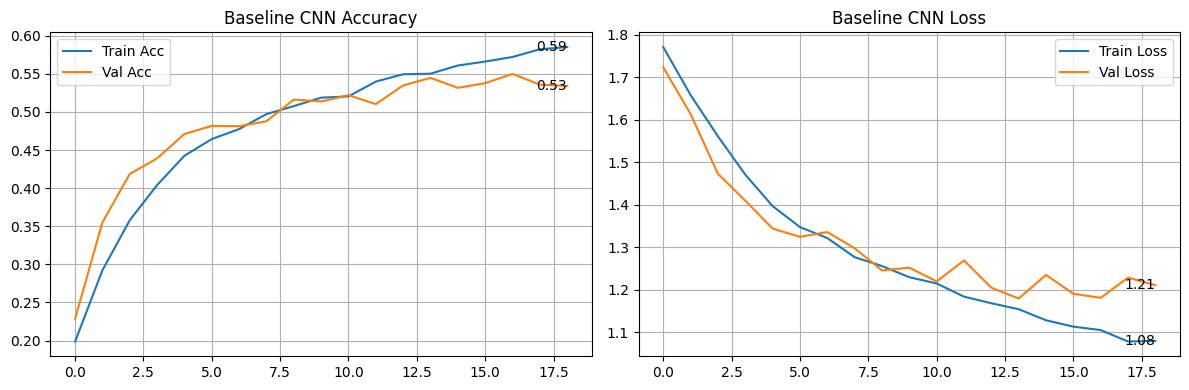

In [ ]:

import matplotlib.pyplot as plt

def plot_history(history, title='Model', log_loss=False, show_final_values=True):
    """
    Plots training and validation accuracy/loss curves.

    Args:
        history: Keras History object.
        title (str): Title prefix for plots.
        log_loss (bool): If True, plots the loss on a logarithmic scale.
        show_final_values (bool): If True, annotates the final acc/loss values.
    """
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    if show_final_values:
        plt.text(len(history.history['accuracy']) - 1, history.history['accuracy'][-1],
                 f"{history.history['accuracy'][-1]:.2f}", va='center', ha='right')
        plt.text(len(history.history['val_accuracy']) - 1, history.history['val_accuracy'][-1],
                 f"{history.history['val_accuracy'][-1]:.2f}", va='center', ha='right')
    plt.title(f'{title} Accuracy')
    plt.grid(True)
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    if show_final_values:
        plt.text(len(history.history['loss']) - 1, history.history['loss'][-1],
                 f"{history.history['loss'][-1]:.2f}", va='center', ha='right')
        plt.text(len(history.history['val_loss']) - 1, history.history['val_loss'][-1],
                 f"{history.history['val_loss'][-1]:.2f}", va='center', ha='right')
    if log_loss:
        plt.yscale('log')
    plt.title(f'{title} Loss')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Your original usage still works:
plot_history(history_base, 'Baseline CNN')


Disscussion of Key Observation:

Model performance: The baseline model achieved total accuray of 51%.

Classification Report: Fear and sad class has least f1-scores, while the values are different for every classes. Happy class having score of 0.68 and fear having low score of 0.31

Confusion matrix: It shows wher the models are doing misclassifications for example: angry vs fear , sad vs neutral

#3.1.3 Deeper CNN with Regularization

###Model Architecture

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#gpu after this
def get_callbacks(model_name):
    return [
        EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1),
        ModelCheckpoint(f'{model_name}_best.h5', monitor='val_loss', save_best_only=True, verbose=1)
    ]


In [ ]:
deeper_model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', input_shape=(img_size, img_size, 3)),
    layers.BatchNormalization(), layers.Activation('relu'),
    layers.MaxPooling2D(2, 2), layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(), layers.Activation('relu'),
    layers.MaxPooling2D(2, 2), layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(), layers.Activation('relu'),
    layers.MaxPooling2D(2, 2), layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), padding='same'),
    layers.BatchNormalization(), layers.Activation('relu'),
    layers.MaxPooling2D(2, 2), layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512), layers.BatchNormalization(), layers.Activation('relu'), layers.Dropout(0.5),
    layers.Dense(256), layers.BatchNormalization(), layers.Activation('relu'), layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

deeper_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

deeper_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,04

 Total params: 1,706,438 (6.51 MB)

 Trainable params: 1,703,942 (6.50 MB)

 Non-trainable params: 2,496 (9.75 KB)

###Model Training and Evaluation

In [ ]:
import time
import numpy as np

# Start timing
start_time = time.time()

# Train the deeper model with early stopping and model checkpoint
history_deep = deeper_model.fit(
    train_generator,
    epochs=60,
    validation_data=val_generator,
    callbacks=get_callbacks("deeper_model")
)

# Time
elapsed_time = time.time() - start_time
print(f"\n Training completed in {elapsed_time:.2f} seconds.")




Epoch 1/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.1904 - loss: 2.2234
Epoch 1: val_loss improved from inf to 1.83740, saving model to deeper_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 80s 385ms/step - accuracy: 0.1905 - loss: 2.2227 - val_accuracy: 0.1748 - val_loss: 1.8374
Epoch 2/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 556ms/step - accuracy: 0.2379 - loss: 1.8570
Epoch 2: val_loss improved from 1.83740 to 1.82298, saving model to deeper_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 120s 640ms/step - accuracy: 0.2380 - loss: 1.8568 - val_accuracy: 0.1758 - val_loss: 1.8230
Epoch 3/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 556ms/step - accuracy: 0.2769 - loss: 1.7282
Epoch 3: val_loss improved from 1.82298 to 1.64813, saving model to deeper_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 121s 642ms/step - accuracy: 0.2770 - loss: 1.7281 - val_accuracy: 0.3232 - val_loss: 1.6481
Epoch 4/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 566ms/step - accuracy: 0.3180 - loss: 1.6353
Epoch 4: val_loss improved from 1.64813 to 1.55358, saving model to deeper_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 123s 652ms/step - accuracy: 0.3181 - loss: 1.6352 - val_accuracy: 0.3856 - val_loss: 1.5536
Epoch 5/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 556ms/step - accuracy: 0.3608 - loss: 1.5693
Epoch 5: val_loss did not improve from 1.55358
188/188 ━━━━━━━━━━━━━━━━━━━━ 126s 667ms/step - accuracy: 0.3608 - loss: 1.5692 - val_accuracy: 0.3504 - val_loss: 1.6839
Epoch 6/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 559ms/step - accuracy: 0.3760 - loss: 1.5299
Epoch 6: val_loss improved from 1.55358 to 1.40171, saving model to deeper_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 122s 646ms/step - accuracy: 0.3761 - loss: 1.5298 - val_accuracy: 0.4449 - val_loss: 1.4017
Epoch 7/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.3929 - loss: 1.4874
Epoch 7: val_loss did not improve from 1.40171
188/188 ━━━━━━━━━━━━━━━━━━━━ 123s 655ms/step - accuracy: 0.3929 - loss: 1.4874 - val_accuracy: 0.4277 - val_loss: 1.4517
Epoch 8/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.4222 - loss: 1.4539
Epoch 8: val_loss improved from 1.40171 to 1.36041, saving model to deeper_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 127s 675ms/step - accuracy: 0.4222 - loss: 1.4538 - val_accuracy: 0.4641 - val_loss: 1.3604
Epoch 9/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - accuracy: 0.4316 - loss: 1.4138
Epoch 9: val_loss did not improve from 1.36041
188/188 ━━━━━━━━━━━━━━━━━━━━ 136s 644ms/step - accuracy: 0.4316 - loss: 1.4138 - val_accuracy: 0.4466 - val_loss: 1.4041
Epoch 10/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.4522 - loss: 1.3919
Epoch 10: val_loss improved from 1.36041 to 1.23673, saving model to deeper_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 80s 425ms/step - accuracy: 0.4522 - loss: 1.3919 - val_accuracy: 0.5255 - val_loss: 1.2367
Epoch 11/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.4664 - loss: 1.3590
Epoch 11: val_loss did not improve from 1.23673
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 218ms/step - accuracy: 0.4663 - loss: 1.3590 - val_accuracy: 0.5129 - val_loss: 1.2509
Epoch 12/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.4636 - loss: 1.3490
Epoch 12: val_loss did not improve from 1.23673
188/188 ━━━━━━━━━━━━━━━━━━━━ 37s 199ms/step - accuracy: 0.4636 - loss: 1.3490 - val_accuracy: 0.5168 - val_loss: 1.2714
Epoch 13/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.4762 - loss: 1.3244
Epoch 13: val_loss did not improve from 1.23673
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 219ms/step - accuracy: 0.4762 - loss: 1.3244 - val_accuracy: 0.4996 - val_loss: 1.2975
Epoch 14/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.4810 - loss: 1.3201
Epoch 14: val_loss i

188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 214ms/step - accuracy: 0.4810 - loss: 1.3201 - val_accuracy: 0.5255 - val_loss: 1.2143
Epoch 15/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.4803 - loss: 1.3036
Epoch 15: val_loss did not improve from 1.21431
188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 211ms/step - accuracy: 0.4803 - loss: 1.3035 - val_accuracy: 0.5324 - val_loss: 1.2163
Epoch 16/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.4899 - loss: 1.2977
Epoch 16: val_loss did not improve from 1.21431
188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 215ms/step - accuracy: 0.4899 - loss: 1.2977 - val_accuracy: 0.4566 - val_loss: 1.3594
Epoch 17/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.4923 - loss: 1.2730
Epoch 17: val_loss did not improve from 1.21431
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 217ms/step - accuracy: 0.4923 - loss: 1.2730 - val_accuracy: 0.5183 - val_loss: 1.2578
Epoch 18/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.5176 - loss: 1.2371
Epoch 18: val_loss d

188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 214ms/step - accuracy: 0.5083 - loss: 1.2461 - val_accuracy: 0.5623 - val_loss: 1.1283
Epoch 21/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.5200 - loss: 1.2302
Epoch 21: val_loss did not improve from 1.12833
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 216ms/step - accuracy: 0.5200 - loss: 1.2303 - val_accuracy: 0.5370 - val_loss: 1.1957
Epoch 22/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.5342 - loss: 1.2115
Epoch 22: val_loss did not improve from 1.12833
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 216ms/step - accuracy: 0.5342 - loss: 1.2115 - val_accuracy: 0.5330 - val_loss: 1.2264
Epoch 23/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.5270 - loss: 1.2207
Epoch 23: val_loss did not improve from 1.12833
188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 214ms/step - accuracy: 0.5269 - loss: 1.2207 - val_accuracy: 0.5185 - val_loss: 1.2286
Epoch 24/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.5250 - loss: 1.2037
Epoch 24: val_loss d

188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 216ms/step - accuracy: 0.5318 - loss: 1.1975 - val_accuracy: 0.5725 - val_loss: 1.1095
Epoch 26/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.5476 - loss: 1.1747
Epoch 26: val_loss improved from 1.10948 to 1.10438, saving model to deeper_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 215ms/step - accuracy: 0.5475 - loss: 1.1748 - val_accuracy: 0.5760 - val_loss: 1.1044
Epoch 27/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.5442 - loss: 1.1665
Epoch 27: val_loss did not improve from 1.10438
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 217ms/step - accuracy: 0.5441 - loss: 1.1665 - val_accuracy: 0.5508 - val_loss: 1.1812
Epoch 28/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.5392 - loss: 1.1801
Epoch 28: val_loss improved from 1.10438 to 1.07076, saving model to deeper_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 216ms/step - accuracy: 0.5392 - loss: 1.1801 - val_accuracy: 0.5866 - val_loss: 1.0708
Epoch 29/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.5614 - loss: 1.1383
Epoch 29: val_loss improved from 1.07076 to 1.06937, saving model to deeper_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 215ms/step - accuracy: 0.5613 - loss: 1.1384 - val_accuracy: 0.5835 - val_loss: 1.0694
Epoch 30/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.5430 - loss: 1.1632
Epoch 30: val_loss did not improve from 1.06937
188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 214ms/step - accuracy: 0.5431 - loss: 1.1632 - val_accuracy: 0.5799 - val_loss: 1.0773
Epoch 31/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.5515 - loss: 1.1554
Epoch 31: val_loss did not improve from 1.06937
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 217ms/step - accuracy: 0.5515 - loss: 1.1554 - val_accuracy: 0.5265 - val_loss: 1.2108
Epoch 32/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.5591 - loss: 1.1336
Epoch 32: val_loss did not improve from 1.06937
188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 212ms/step - accuracy: 0.5591 - loss: 1.1336 - val_accuracy: 0.5698 - val_loss: 1.1386
Epoch 33/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.5590 - loss: 1.1389
Epoch 33: val_loss d

188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 225ms/step - accuracy: 0.5689 - loss: 1.1123 - val_accuracy: 0.5918 - val_loss: 1.0640
Epoch 35/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.5732 - loss: 1.1132
Epoch 35: val_loss did not improve from 1.06400
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 216ms/step - accuracy: 0.5732 - loss: 1.1133 - val_accuracy: 0.5885 - val_loss: 1.0752
Epoch 36/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.5764 - loss: 1.1096
Epoch 36: val_loss did not improve from 1.06400
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 217ms/step - accuracy: 0.5764 - loss: 1.1097 - val_accuracy: 0.5500 - val_loss: 1.1353
Epoch 37/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.5734 - loss: 1.1089
Epoch 37: val_loss improved from 1.06400 to 1.06268, saving model to deeper_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 224ms/step - accuracy: 0.5734 - loss: 1.1089 - val_accuracy: 0.5865 - val_loss: 1.0627
Epoch 38/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.5694 - loss: 1.1169
Epoch 38: val_loss did not improve from 1.06268
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 217ms/step - accuracy: 0.5694 - loss: 1.1169 - val_accuracy: 0.5760 - val_loss: 1.1003
Epoch 39/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.5834 - loss: 1.0953
Epoch 39: val_loss did not improve from 1.06268
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 218ms/step - accuracy: 0.5834 - loss: 1.0953 - val_accuracy: 0.5573 - val_loss: 1.1548
Epoch 40/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.5761 - loss: 1.0915
Epoch 40: val_loss did not improve from 1.06268
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 218ms/step - accuracy: 0.5761 - loss: 1.0916 - val_accuracy: 0.5270 - val_loss: 1.2436
Epoch 41/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.5760 - loss: 1.0901
Epoch 41: val_loss i

188/188 ━━━━━━━━━━━━━━━━━━━━ 63s 333ms/step - accuracy: 0.5761 - loss: 1.0901 - val_accuracy: 0.5967 - val_loss: 1.0517
Epoch 42/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 578ms/step - accuracy: 0.5844 - loss: 1.0699
Epoch 42: val_loss did not improve from 1.05165
188/188 ━━━━━━━━━━━━━━━━━━━━ 144s 663ms/step - accuracy: 0.5844 - loss: 1.0700 - val_accuracy: 0.5787 - val_loss: 1.0800
Epoch 43/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.5792 - loss: 1.0930
Epoch 43: val_loss did not improve from 1.05165
188/188 ━━━━━━━━━━━━━━━━━━━━ 126s 668ms/step - accuracy: 0.5792 - loss: 1.0930 - val_accuracy: 0.5892 - val_loss: 1.0706
Epoch 44/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.5856 - loss: 1.0727
Epoch 44: val_loss did not improve from 1.05165
188/188 ━━━━━━━━━━━━━━━━━━━━ 122s 651ms/step - accuracy: 0.5856 - loss: 1.0727 - val_accuracy: 0.4999 - val_loss: 1.2926
Epoch 45/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.5933 - loss: 1.0694
Epoch 45: val_los

188/188 ━━━━━━━━━━━━━━━━━━━━ 94s 503ms/step - accuracy: 0.6021 - loss: 1.0191 - val_accuracy: 0.6040 - val_loss: 1.0505
Epoch 53/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - accuracy: 0.6113 - loss: 1.0106
Epoch 53: val_loss did not improve from 1.05048
188/188 ━━━━━━━━━━━━━━━━━━━━ 117s 622ms/step - accuracy: 0.6113 - loss: 1.0107 - val_accuracy: 0.5858 - val_loss: 1.0672
Epoch 54/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.6130 - loss: 1.0107
Epoch 54: val_loss did not improve from 1.05048
188/188 ━━━━━━━━━━━━━━━━━━━━ 146s 643ms/step - accuracy: 0.6130 - loss: 1.0108 - val_accuracy: 0.5813 - val_loss: 1.0846
Epoch 55/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.6134 - loss: 1.0030
Epoch 55: val_loss did not improve from 1.05048
188/188 ━━━━━━━━━━━━━━━━━━━━ 116s 618ms/step - accuracy: 0.6134 - loss: 1.0030 - val_accuracy: 0.5990 - val_loss: 1.0529
Epoch 56/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.6264 - loss: 0.9866
Epoch 56: val_los

Final Training Accuracy: 0.6177
Final Validation Accuracy: 0.5783
Best Validation Accuracy: 0.6040 at Epoch 52


c:\Users\liven\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5446 - loss: 1.1603


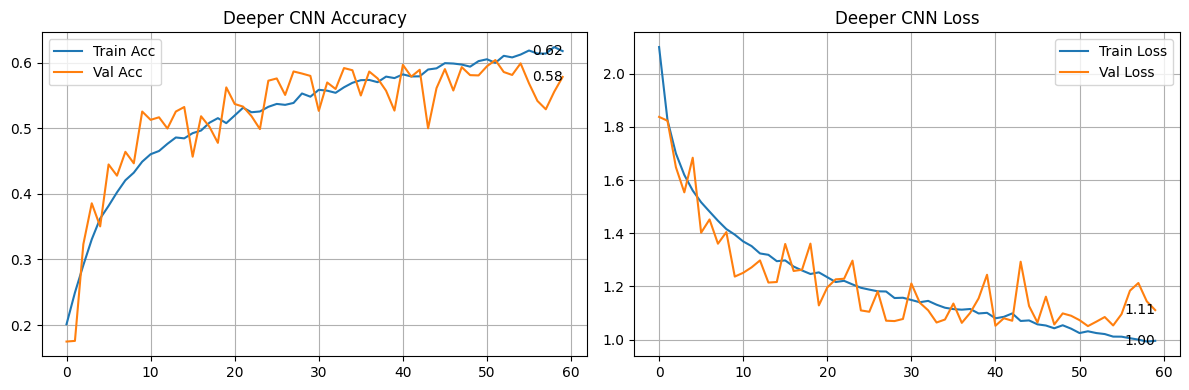

In [ ]:
# Final metrics
final_train_acc = history_deep.history['accuracy'][-1]
final_val_acc = history_deep.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# Identify best epoch
best_epoch = np.argmax(history_deep.history['val_accuracy']) + 1
best_val_acc = np.max(history_deep.history['val_accuracy'])
print(f"Best Validation Accuracy: {best_val_acc:.4f} at Epoch {best_epoch}")

# Evaluate on test data
deeper_model.evaluate(test_generator)

# Plot the training curves
plot_history(history_deep, 'Deeper CNN', log_loss=False, show_final_values=True)

#3.1.4. Experimentation and Comparative Analysis

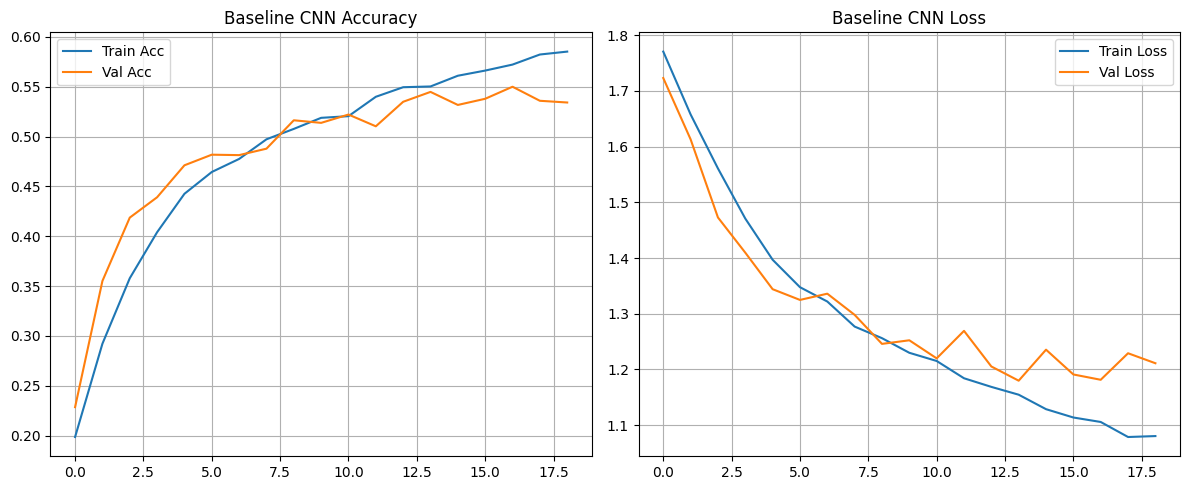

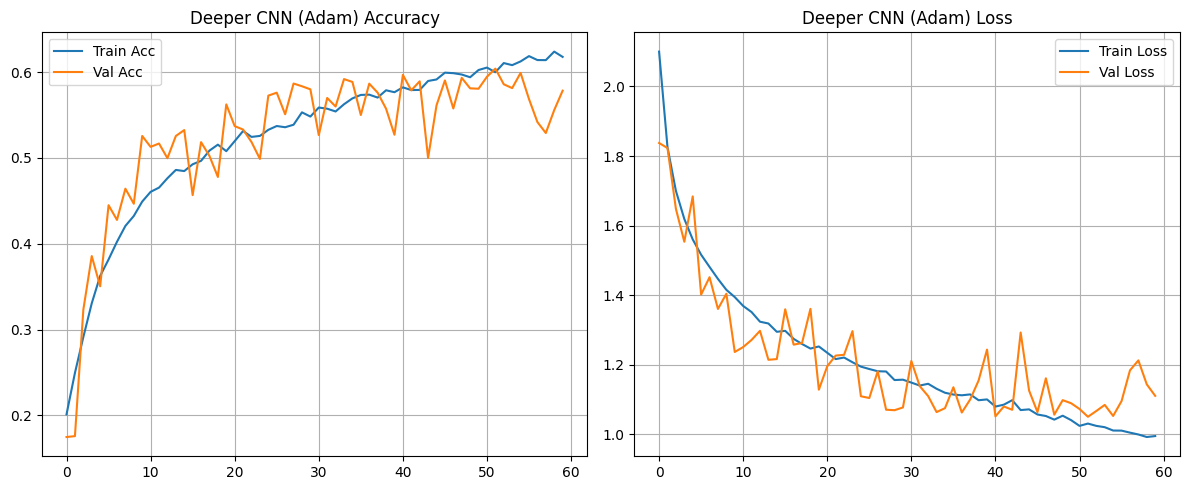

In [ ]:
#baseline CNN, deeper CNN
import numpy as np

def plot_history(history, title='Model'):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example for baseline
plot_history(history_base, "Baseline CNN")
plot_history(history_deep, 'Deeper CNN (Adam)')


Discussion:

Accuracy: Baseline mode achieved accuracy 0.51, while the deeper CNN model accuracy reached 0.61 so clearly deeper CNN has better accuracy.

Percision,Recall, and F1-score:

Deeper CNN has better accuracy and shows improvements in almost all the classes. Along with perision, recall and f1-scores are also better in deeper CNN model.

Confusion matrix:

Comparitively, Deeper CNN has less misclassification than basline CNN but still struggles with classes like "fear" vs "sad" and "neural" vs "sad".

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step
Baseline CNN Classification Report:
              precision    recall  f1-score   support

       angry       0.46      0.57      0.51       300
        fear       0.38      0.25      0.31       300
       happy       0.66      0.70      0.68       300
     neutral       0.44      0.59      0.50       300
         sad       0.40      0.39      0.39       300
    surprise       0.80      0.58      0.67       300

    accuracy                           0.51      1800
   macro avg       0.52      0.51      0.51      1800
weighted avg       0.52      0.51      0.51      1800



<Figure size 800x600 with 0 Axes>

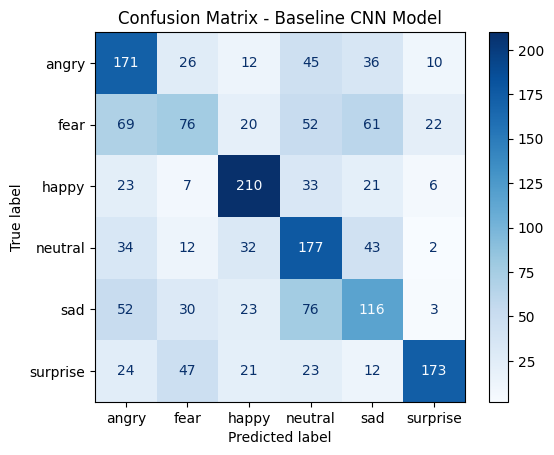


Deeper CNN Classification Report (Adam):
              precision    recall  f1-score   support

       angry       0.53      0.60      0.56       300
        fear       0.47      0.26      0.33       300
       happy       0.79      0.75      0.77       300
     neutral       0.52      0.59      0.55       300
         sad       0.44      0.49      0.47       300
    surprise       0.71      0.79      0.75       300

    accuracy                           0.58      1800
   macro avg       0.58      0.58      0.57      1800
weighted avg       0.58      0.58      0.57      1800



<Figure size 800x600 with 0 Axes>

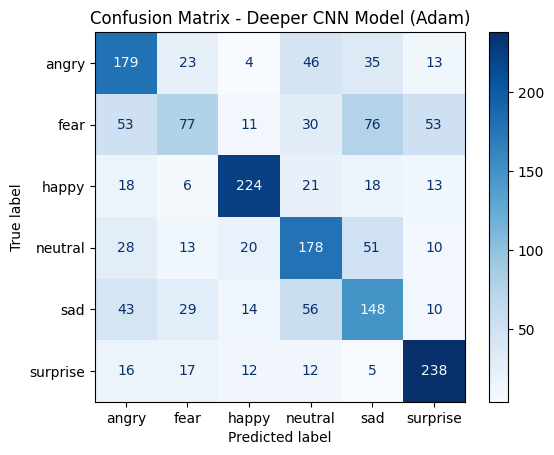


 Baseline CNN - Accuracy: 0.5128, Weighted F1-score: 0.5098
Deeper CNN - Accuracy: 0.5800, Weighted F1-score: 0.5713


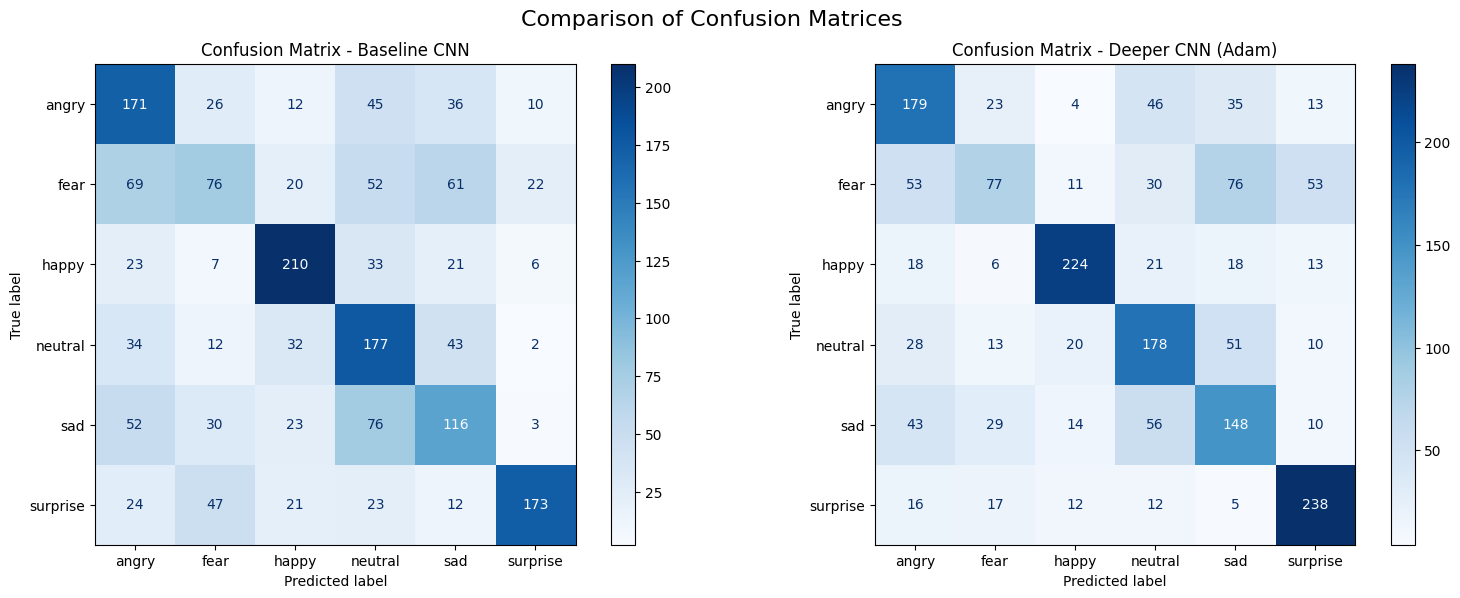

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

class_names = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Predictions
y_pred = baseline_model.predict(test_generator)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

y_pred_adam = deeper_model.predict(test_generator)
y_pred_labels_adam = np.argmax(y_pred_adam, axis=1)

# Confusion matrices
cm_adam = confusion_matrix(y_true, y_pred_labels_adam)
bl_adam = confusion_matrix(y_true, y_pred_labels)

# Classification Reports
print("Baseline CNN Classification Report:")
print(classification_report(y_true, y_pred_labels, target_names=class_names))

plt.figure(figsize=(8, 6))
disp1 = ConfusionMatrixDisplay(confusion_matrix=bl_adam, display_labels=class_names)
disp1.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Baseline CNN Model")
plt.show()

print("\nDeeper CNN Classification Report (Adam):")
print(classification_report(y_true, y_pred_labels_adam, target_names=class_names))

plt.figure(figsize=(8, 6))
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_adam, display_labels=class_names)
disp2.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Deeper CNN Model (Adam)")
plt.show()

# Accuracy and F1-score Summary
baseline_acc = accuracy_score(y_true, y_pred_labels)
deeper_acc = accuracy_score(y_true, y_pred_labels_adam)
baseline_f1 = f1_score(y_true, y_pred_labels, average='weighted')
deeper_f1 = f1_score(y_true, y_pred_labels_adam, average='weighted')

print(f"\n Baseline CNN - Accuracy: {baseline_acc:.4f}, Weighted F1-score: {baseline_f1:.4f}")
print(f"Deeper CNN - Accuracy: {deeper_acc:.4f}, Weighted F1-score: {deeper_f1:.4f}")

# Side-by-side Confusion Matrix Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
ConfusionMatrixDisplay(bl_adam, display_labels=class_names).plot(ax=axes[0], cmap=plt.cm.Blues, values_format='d')
axes[0].set_title("Confusion Matrix - Baseline CNN")

ConfusionMatrixDisplay(cm_adam, display_labels=class_names).plot(ax=axes[1], cmap=plt.cm.Blues, values_format='d')
axes[1].set_title("Confusion Matrix - Deeper CNN (Adam)")

plt.suptitle("Comparison of Confusion Matrices", fontsize=16)
plt.tight_layout()
plt.show()


1. Evaluate the deeper model on the same performance metrics as the
   baseline model.

- The deeper CNN model gave an accuracy of 0.58.

- Confusion Matrix : It displays misclassifications, especially for
  "fear" and "sad" classes, issues with "fear" and "sad".

- Sample Predictions : Confirm reasonable performance with some
  misclassifications, particularly for "sad" and "neutral".

2. Discuss improvements (or lack thereof) compared to the baseline
   model.

- The Deeper CNN performed better than the baseline CNN as Deeper CNN has an f1-score of 0.58 and it has also improved scores for fear which is 0.33 and sad which is 0.47 where for basline CNN it was fear:0.31 sad:0.39.

- Deeper CNN has additional layes with reularization techniques which   can be the reason it performed better than baseline CNN. Dropouts and batch normalization were the additional layers. Even though it has performed great there are still issues in some classes and in confusion matrix misclassifications are visible.

In [ ]:
from tensorflow.keras.optimizers import SGD
# Train deeper model with SGD optimizer
sgd_model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', input_shape=(img_size, img_size, 3)),
    layers.BatchNormalization(), layers.Activation('relu'),
    layers.MaxPooling2D(2, 2), layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(), layers.Activation('relu'),
    layers.MaxPooling2D(2, 2), layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(), layers.Activation('relu'),
    layers.MaxPooling2D(2, 2), layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), padding='same'),
    layers.BatchNormalization(), layers.Activation('relu'),
    layers.MaxPooling2D(2, 2), layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512), layers.BatchNormalization(), layers.Activation('relu'), layers.Dropout(0.5),
    layers.Dense(256), layers.BatchNormalization(), layers.Activation('relu'), layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

c:\Users\liven\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the SGD model
sgd_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Print summary
sgd_model.summary()

# Check for any layers frozen
frozen_layers = [layer.name for layer in sgd_model.layers if not layer.trainable]
if frozen_layers:
    print("\n Frozen layers detected:")
    for layer in frozen_layers:
        print(f" - {layer}")
else:
    print("\n All layers are trainable.")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 512)            │         2,04

 Total params: 1,706,438 (6.51 MB)

 Trainable params: 1,703,942 (6.50 MB)

 Non-trainable params: 2,496 (9.75 KB)


 All layers are trainable.


Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.1891 - loss: 2.1187
Epoch 1: val_loss improved from inf to 1.74703, saving model to sgd_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 110s 556ms/step - accuracy: 0.1892 - loss: 2.1179 - val_accuracy: 0.2119 - val_loss: 1.7470
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.2291 - loss: 1.8028
Epoch 2: val_loss improved from 1.74703 to 1.72274, saving model to sgd_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 104s 554ms/step - accuracy: 0.2291 - loss: 1.8028 - val_accuracy: 0.2753 - val_loss: 1.7227
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.2428 - loss: 1.7745
Epoch 3: val_loss improved from 1.72274 to 1.65310, saving model to sgd_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 106s 565ms/step - accuracy: 0.2428 - loss: 1.7744 - val_accuracy: 0.3132 - val_loss: 1.6531
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.2618 - loss: 1.7282
Epoch 4: val_loss did not improve from 1.65310
188/188 ━━━━━━━━━━━━━━━━━━━━ 106s 563ms/step - accuracy: 0.2618 - loss: 1.7282 - val_accuracy: 0.2687 - val_loss: 1.7008
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.2850 - loss: 1.7045
Epoch 5: val_loss improved from 1.65310 to 1.58934, saving model to sgd_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 562ms/step - accuracy: 0.2850 - loss: 1.7044 - val_accuracy: 0.3570 - val_loss: 1.5893
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.2990 - loss: 1.6686
Epoch 6: val_loss did not improve from 1.58934
188/188 ━━━━━━━━━━━━━━━━━━━━ 106s 565ms/step - accuracy: 0.2990 - loss: 1.6686 - val_accuracy: 0.2972 - val_loss: 1.8439
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.3142 - loss: 1.6399
Epoch 7: val_loss did not improve from 1.58934
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 566ms/step - accuracy: 0.3141 - loss: 1.6399 - val_accuracy: 0.3589 - val_loss: 1.6349
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.3193 - loss: 1.6316
Epoch 8: val_loss improved from 1.58934 to 1.51332, saving model to sgd_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 107s 567ms/step - accuracy: 0.3193 - loss: 1.6316 - val_accuracy: 0.3999 - val_loss: 1.5133
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.3398 - loss: 1.5950
Epoch 9: val_loss did not improve from 1.51332
188/188 ━━━━━━━━━━━━━━━━━━━━ 108s 576ms/step - accuracy: 0.3398 - loss: 1.5951 - val_accuracy: 0.3833 - val_loss: 1.5664
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.3422 - loss: 1.5871
Epoch 10: val_loss improved from 1.51332 to 1.48462, saving model to sgd_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 107s 567ms/step - accuracy: 0.3422 - loss: 1.5871 - val_accuracy: 0.4098 - val_loss: 1.4846
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.3530 - loss: 1.5668
Epoch 11: val_loss improved from 1.48462 to 1.43717, saving model to sgd_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 106s 566ms/step - accuracy: 0.3530 - loss: 1.5668 - val_accuracy: 0.4269 - val_loss: 1.4372
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.3671 - loss: 1.5501
Epoch 12: val_loss improved from 1.43717 to 1.43448, saving model to sgd_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 107s 569ms/step - accuracy: 0.3671 - loss: 1.5501 - val_accuracy: 0.4289 - val_loss: 1.4345
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.3777 - loss: 1.5275
Epoch 13: val_loss improved from 1.43448 to 1.38436, saving model to sgd_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 107s 567ms/step - accuracy: 0.3777 - loss: 1.5275 - val_accuracy: 0.4463 - val_loss: 1.3844
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.3810 - loss: 1.5189
Epoch 14: val_loss improved from 1.38436 to 1.37639, saving model to sgd_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 106s 562ms/step - accuracy: 0.3810 - loss: 1.5188 - val_accuracy: 0.4526 - val_loss: 1.3764
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.3940 - loss: 1.4926
Epoch 15: val_loss did not improve from 1.37639
188/188 ━━━━━━━━━━━━━━━━━━━━ 106s 564ms/step - accuracy: 0.3940 - loss: 1.4926 - val_accuracy: 0.4594 - val_loss: 1.3883
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.3949 - loss: 1.4876
Epoch 16: val_loss improved from 1.37639 to 1.33599, saving model to sgd_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 106s 562ms/step - accuracy: 0.3949 - loss: 1.4876 - val_accuracy: 0.4766 - val_loss: 1.3360
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.4021 - loss: 1.4805
Epoch 17: val_loss improved from 1.33599 to 1.31243, saving model to sgd_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 106s 562ms/step - accuracy: 0.4021 - loss: 1.4805 - val_accuracy: 0.4861 - val_loss: 1.3124
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.4127 - loss: 1.4598
Epoch 18: val_loss did not improve from 1.31243
188/188 ━━━━━━━━━━━━━━━━━━━━ 141s 557ms/step - accuracy: 0.4127 - loss: 1.4598 - val_accuracy: 0.4792 - val_loss: 1.3221
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.4170 - loss: 1.4380
Epoch 19: val_loss improved from 1.31243 to 1.29805, saving model to sgd_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 143s 562ms/step - accuracy: 0.4170 - loss: 1.4381 - val_accuracy: 0.4874 - val_loss: 1.2980
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.4133 - loss: 1.4407
Epoch 20: val_loss did not improve from 1.29805
188/188 ━━━━━━━━━━━━━━━━━━━━ 141s 557ms/step - accuracy: 0.4133 - loss: 1.4407 - val_accuracy: 0.4904 - val_loss: 1.3057
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.4288 - loss: 1.4238
Epoch 21: val_loss did not improve from 1.29805
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 560ms/step - accuracy: 0.4287 - loss: 1.4238 - val_accuracy: 0.3708 - val_loss: 1.5689
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.4288 - loss: 1.4059
Epoch 22: val_loss improved from 1.29805 to 1.28260, saving model to sgd_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 139s 544ms/step - accuracy: 0.4288 - loss: 1.4059 - val_accuracy: 0.4923 - val_loss: 1.2826
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.4299 - loss: 1.4101
Epoch 23: val_loss did not improve from 1.28260
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 544ms/step - accuracy: 0.4299 - loss: 1.4101 - val_accuracy: 0.4185 - val_loss: 1.4320
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.4473 - loss: 1.3863
Epoch 24: val_loss improved from 1.28260 to 1.25263, saving model to sgd_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 102s 543ms/step - accuracy: 0.4473 - loss: 1.3863 - val_accuracy: 0.5042 - val_loss: 1.2526
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.4464 - loss: 1.3789
Epoch 25: val_loss did not improve from 1.25263
188/188 ━━━━━━━━━━━━━━━━━━━━ 102s 544ms/step - accuracy: 0.4464 - loss: 1.3789 - val_accuracy: 0.4605 - val_loss: 1.3538
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.4515 - loss: 1.3818
Epoch 26: val_loss did not improve from 1.25263
188/188 ━━━━━━━━━━━━━━━━━━━━ 102s 542ms/step - accuracy: 0.4516 - loss: 1.3818 - val_accuracy: 0.4572 - val_loss: 1.3762
Epoch 27/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.4523 - loss: 1.3658
Epoch 27: val_loss did not improve from 1.25263
188/188 ━━━━━━━━━━━━━━━━━━━━ 103s 547ms/step - accuracy: 0.4523 - loss: 1.3658 - val_accuracy: 0.5037 - val_loss: 1.2810
Epoch 28/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.4657 - loss: 1.3496
Epoch 28: val_lo

188/188 ━━━━━━━━━━━━━━━━━━━━ 105s 559ms/step - accuracy: 0.4579 - loss: 1.3563 - val_accuracy: 0.5113 - val_loss: 1.2460
Epoch 30/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.4687 - loss: 1.3239
Epoch 30: val_loss did not improve from 1.24601
188/188 ━━━━━━━━━━━━━━━━━━━━ 103s 546ms/step - accuracy: 0.4687 - loss: 1.3239 - val_accuracy: 0.5075 - val_loss: 1.2686
Epoch 31/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.4808 - loss: 1.3266
Epoch 31: val_loss improved from 1.24601 to 1.18217, saving model to sgd_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 103s 547ms/step - accuracy: 0.4808 - loss: 1.3266 - val_accuracy: 0.5451 - val_loss: 1.1822
Epoch 32/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.4777 - loss: 1.3376
Epoch 32: val_loss did not improve from 1.18217
188/188 ━━━━━━━━━━━━━━━━━━━━ 104s 553ms/step - accuracy: 0.4777 - loss: 1.3376 - val_accuracy: 0.5255 - val_loss: 1.2328
Epoch 33/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.4789 - loss: 1.3197
Epoch 33: val_loss did not improve from 1.18217
188/188 ━━━━━━━━━━━━━━━━━━━━ 103s 546ms/step - accuracy: 0.4790 - loss: 1.3196 - val_accuracy: 0.5193 - val_loss: 1.2383
Epoch 34/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.4871 - loss: 1.3040
Epoch 34: val_loss did not improve from 1.18217
188/188 ━━━━━━━━━━━━━━━━━━━━ 102s 544ms/step - accuracy: 0.4871 - loss: 1.3041 - val_accuracy: 0.5379 - val_loss: 1.1907
Epoch 35/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.4796 - loss: 1.3036
Epoch 35: val_lo

188/188 ━━━━━━━━━━━━━━━━━━━━ 103s 546ms/step - accuracy: 0.5035 - loss: 1.2726 - val_accuracy: 0.5537 - val_loss: 1.1516
Epoch 37/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.4925 - loss: 1.2814
Epoch 37: val_loss improved from 1.15162 to 1.14596, saving model to sgd_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 143s 549ms/step - accuracy: 0.4925 - loss: 1.2814 - val_accuracy: 0.5603 - val_loss: 1.1460
Epoch 38/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.4927 - loss: 1.2856
Epoch 38: val_loss did not improve from 1.14596
188/188 ━━━━━━━━━━━━━━━━━━━━ 103s 545ms/step - accuracy: 0.4927 - loss: 1.2856 - val_accuracy: 0.5373 - val_loss: 1.2000
Epoch 39/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.5003 - loss: 1.2726
Epoch 39: val_loss did not improve from 1.14596
188/188 ━━━━━━━━━━━━━━━━━━━━ 72s 382ms/step - accuracy: 0.5002 - loss: 1.2726 - val_accuracy: 0.5416 - val_loss: 1.1721
Epoch 40/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.5034 - loss: 1.2621
Epoch 40: val_loss did not improve from 1.14596
188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 224ms/step - accuracy: 0.5033 - loss: 1.2621 - val_accuracy: 0.5501 - val_loss: 1.1480
Epoch 41/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.5065 - loss: 1.2559
Epoch 41: val_loss

188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 211ms/step - accuracy: 0.5065 - loss: 1.2559 - val_accuracy: 0.5681 - val_loss: 1.1294
Epoch 42/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.5022 - loss: 1.2520
Epoch 42: val_loss did not improve from 1.12936
188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 206ms/step - accuracy: 0.5022 - loss: 1.2520 - val_accuracy: 0.5551 - val_loss: 1.1555
Epoch 43/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.5086 - loss: 1.2482
Epoch 43: val_loss did not improve from 1.12936
188/188 ━━━━━━━━━━━━━━━━━━━━ 87s 462ms/step - accuracy: 0.5086 - loss: 1.2482 - val_accuracy: 0.5362 - val_loss: 1.1796
Epoch 44/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.5165 - loss: 1.2449
Epoch 44: val_loss did not improve from 1.12936
188/188 ━━━━━━━━━━━━━━━━━━━━ 114s 604ms/step - accuracy: 0.5165 - loss: 1.2449 - val_accuracy: 0.5612 - val_loss: 1.1450
Epoch 45/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.5157 - loss: 1.2481
Epoch 45: val_loss 

188/188 ━━━━━━━━━━━━━━━━━━━━ 114s 606ms/step - accuracy: 0.5307 - loss: 1.2159 - val_accuracy: 0.5701 - val_loss: 1.1240
Epoch 49/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.5269 - loss: 1.2235
Epoch 49: val_loss improved from 1.12402 to 1.09896, saving model to sgd_model_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 114s 604ms/step - accuracy: 0.5269 - loss: 1.2236 - val_accuracy: 0.5733 - val_loss: 1.0990
Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.5182 - loss: 1.2126
Epoch 50: val_loss did not improve from 1.09896
188/188 ━━━━━━━━━━━━━━━━━━━━ 113s 602ms/step - accuracy: 0.5182 - loss: 1.2127 - val_accuracy: 0.5556 - val_loss: 1.1619
Restoring model weights from the end of the best epoch: 49.
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.5007 - loss: 1.2574

 Test Loss: 1.1949
 Test Accuracy: 0.5367


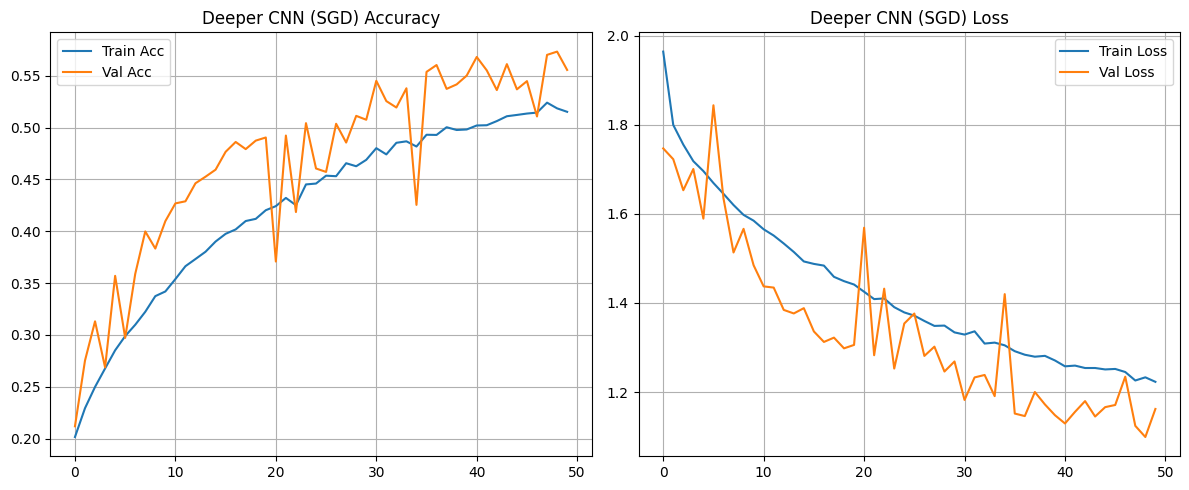

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Train the deeper model with SGD
history_sgd = sgd_model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=get_callbacks("sgd_model")
)

# Evaluate SGD model
loss, acc = sgd_model.evaluate(test_generator)
print(f"\n Test Loss: {loss:.4f}")
print(f" Test Accuracy: {acc:.4f}")

class_names = list(test_generator.class_indices.keys())
# Plot training history
plot_history(history_sgd, 'Deeper CNN (SGD)')



## 2. Computational Efficiency [2]

Discussion:

Training time: Deeper CNN model takes longer to train compare to basline CNN model as the deeper CNN model adds additional layers and also need more memory, the time frame of Deeper CNN is approximately (1680 seconds) and basline CNN is approximately (985 seconds).

Trade-offs: As mention the Deeper CNN has additional layers and needs more memory but provides better results, it comes at the cost of increased traning period.

In [ ]:
pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB 259.2 kB/s eta 0:00:43
   ---------------------------------------- 0.0/11.1 MB 259.2 kB/s eta 0:00:43
   ---------------------------------------- 0.1/11.1 MB 435.7 kB/s eta 0:00:26
   ---------------------------------------- 0.1/11.1 MB 435.7 kB/s eta 0:00:26
   ---------------------------------------- 0.1/11.1 MB 435.7 kB/s eta 0:00:26
   ---------------------------------------- 0.1/11.1 MB 435.7 kB/s eta 0:00:26
    --------------------------------------- 0.2/11.1 MB 426.7 kB/s eta 0:00:26
    --------------------------------------- 0.2/11.1 MB 445.2 kB/s eta 0:00:25
    ---------------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step

=== Classification Report (Adam) ===
              precision    recall  f1-score   support

       angry       0.53      0.60      0.56       300
        fear       0.47      0.26      0.33       300
       happy       0.79      0.75      0.77       300
     neutral       0.52      0.59      0.55       300
         sad       0.44      0.49      0.47       300
    surprise       0.71      0.79      0.75       300

    accuracy                           0.58      1800
   macro avg       0.58      0.58      0.57      1800
weighted avg       0.58      0.58      0.57      1800



<Figure size 800x600 with 0 Axes>

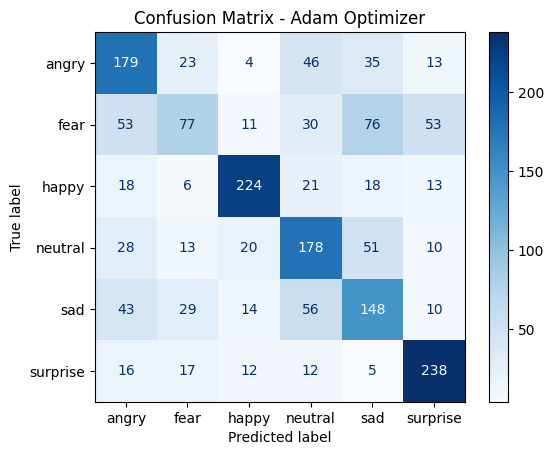


=== Classification Report (SGD) ===
              precision    recall  f1-score   support

       angry       0.57      0.55      0.56       300
        fear       0.56      0.18      0.28       300
       happy       0.67      0.80      0.73       300
     neutral       0.46      0.65      0.54       300
         sad       0.42      0.45      0.43       300
    surprise       0.75      0.77      0.76       300

    accuracy                           0.57      1800
   macro avg       0.57      0.57      0.55      1800
weighted avg       0.57      0.57      0.55      1800



<Figure size 800x600 with 0 Axes>

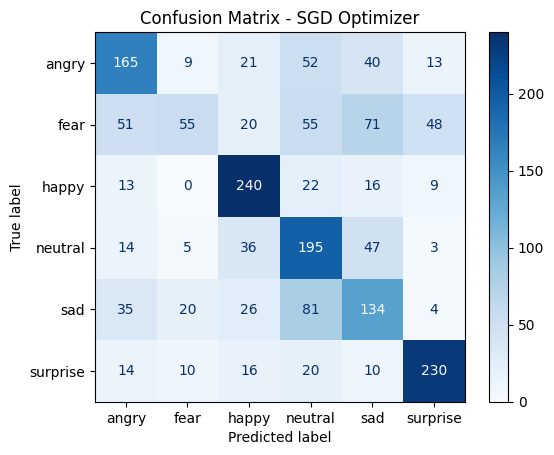

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

class_names = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']  # Only 6 classes

# Evaluate both models on test set
y_pred_adam = deeper_model.predict(test_generator)
y_pred_sgd = sgd_model.predict(test_generator)

y_pred_labels_adam = np.argmax(y_pred_adam, axis=1)
y_pred_labels_sgd = np.argmax(y_pred_sgd, axis=1)
y_true = test_generator.classes

# Compute confusion matrices
cm_adam = confusion_matrix(y_true, y_pred_labels_adam)
cm_sgd = confusion_matrix(y_true, y_pred_labels_sgd)

# Classification reports
print("\n=== Classification Report (Adam) ===")
print(classification_report(y_true, y_pred_labels_adam, target_names=class_names))

# Plot confusion matrix for Adam
plt.figure(figsize=(8, 6))
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_adam, display_labels=class_names)
disp1.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Adam Optimizer")
plt.show()

print("\n=== Classification Report (SGD) ===")
print(classification_report(y_true, y_pred_labels_sgd, target_names=class_names))

# Plot confusion matrix for SGD
plt.figure(figsize=(8, 6))
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_sgd, display_labels=class_names)
disp2.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - SGD Optimizer")
plt.show()

Discussion:

Convergence Speed: In this case, Adam optimizer converges faster than the SGD optimizer and not only converges faster but also provides better accuracies comparing to the SGD optimizer. For the performance evaluation the f1-accuracy from adam optimizer is 0.58 and sgd is 0.57 and adam optimizer has better accuracy for sad and fear classes as well.

## 4. Challenges and Observations [3]:


Challenges:

Overfitting : Deeper model tends to overfit if regularization techniques is not used properly. Early stopping, batch normalization and dropout helps to minimize this issue.

Underfitting : Baseline model might underfit due to its simple architecture. The deeper model enhances this by adding more convolutional layers and regularization.

Convergence Issues : he SGD optimizer struggles to converge properly, resulting in less effective performance.

Training Time:
Baseline Model : Approximately 960 seconds.
Deeper Model (Adam) : Approximately 1780 seconds.
Deeper Model (SGD) : Approximately 1917 seconds.

Hardware Acceleration:

Google Colab with GPU/TPU : Hardware acceleration was used to speed up training and reduce computation time.

#3.2 Part B: Fine-Tuning a Pre-Trained Model (Transfer Learning).

###Loading and Adapting a Pre - Trained Model

In [ ]:
# Data loaders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Print class mapping
print("Class indices:", train_generator.class_indices)

Found 11987 images belonging to 6 classes.
Found 6965 images belonging to 6 classes.
Found 1498 images belonging to 6 classes.
Class indices: {'angry': 0, 'fear': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprise': 5}


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=64,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=64,
    class_mode='categorical'
)

Found 11987 images belonging to 6 classes.
Found 6965 images belonging to 6 classes.


###Model Training and Fine - Tuning

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

img_size = 224  # IMPORTANT for VGG

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x) #fully connected layer to learn abstract feature
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)#final clssification layer for facial expression class (6 classes)

model_tl = Model(inputs=base_model.input, outputs=x)#combines frozen VGG16 base with new classification head into a complete model

model_tl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_tl = model_tl.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=get_callbacks("vgg16")
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.2219 - loss: 1.8020
Epoch 1: val_loss improved from inf to 1.66172, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 136s 608ms/step - accuracy: 0.2220 - loss: 1.8017 - val_accuracy: 0.3232 - val_loss: 1.6617
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.3073 - loss: 1.6594
Epoch 2: val_loss improved from 1.66172 to 1.62972, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 89s 471ms/step - accuracy: 0.3073 - loss: 1.6594 - val_accuracy: 0.3397 - val_loss: 1.6297
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.3296 - loss: 1.6251
Epoch 3: val_loss improved from 1.62972 to 1.61704, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 88s 466ms/step - accuracy: 0.3296 - loss: 1.6251 - val_accuracy: 0.3370 - val_loss: 1.6170
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.3416 - loss: 1.5957
Epoch 4: val_loss improved from 1.61704 to 1.57060, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 88s 468ms/step - accuracy: 0.3417 - loss: 1.5957 - val_accuracy: 0.3727 - val_loss: 1.5706
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.3484 - loss: 1.5918
Epoch 5: val_loss improved from 1.57060 to 1.56796, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 88s 467ms/step - accuracy: 0.3484 - loss: 1.5917 - val_accuracy: 0.3742 - val_loss: 1.5680
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.3630 - loss: 1.5597
Epoch 6: val_loss did not improve from 1.56796
188/188 ━━━━━━━━━━━━━━━━━━━━ 88s 466ms/step - accuracy: 0.3630 - loss: 1.5597 - val_accuracy: 0.3246 - val_loss: 1.6295
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.3767 - loss: 1.5501
Epoch 7: val_loss improved from 1.56796 to 1.54148, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 152s 521ms/step - accuracy: 0.3767 - loss: 1.5501 - val_accuracy: 0.3934 - val_loss: 1.5415
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.3732 - loss: 1.5429
Epoch 8: val_loss improved from 1.54148 to 1.50699, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 89s 471ms/step - accuracy: 0.3732 - loss: 1.5428 - val_accuracy: 0.4066 - val_loss: 1.5070
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.3842 - loss: 1.5184
Epoch 9: val_loss improved from 1.50699 to 1.49873, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 88s 468ms/step - accuracy: 0.3842 - loss: 1.5184 - val_accuracy: 0.4171 - val_loss: 1.4987
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.3852 - loss: 1.5204
Epoch 10: val_loss did not improve from 1.49873
188/188 ━━━━━━━━━━━━━━━━━━━━ 96s 511ms/step - accuracy: 0.3852 - loss: 1.5204 - val_accuracy: 0.3888 - val_loss: 1.5289
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.3824 - loss: 1.5148
Epoch 11: val_loss improved from 1.49873 to 1.48021, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 97s 516ms/step - accuracy: 0.3825 - loss: 1.5148 - val_accuracy: 0.4191 - val_loss: 1.4802
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.3922 - loss: 1.5083
Epoch 12: val_loss improved from 1.48021 to 1.47204, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 89s 471ms/step - accuracy: 0.3922 - loss: 1.5082 - val_accuracy: 0.4080 - val_loss: 1.4720
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.3931 - loss: 1.5039
Epoch 13: val_loss improved from 1.47204 to 1.46542, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 88s 469ms/step - accuracy: 0.3931 - loss: 1.5038 - val_accuracy: 0.4202 - val_loss: 1.4654
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.3995 - loss: 1.4883
Epoch 14: val_loss did not improve from 1.46542
188/188 ━━━━━━━━━━━━━━━━━━━━ 143s 474ms/step - accuracy: 0.3995 - loss: 1.4883 - val_accuracy: 0.4111 - val_loss: 1.4999
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.4021 - loss: 1.4863
Epoch 15: val_loss did not improve from 1.46542
188/188 ━━━━━━━━━━━━━━━━━━━━ 88s 469ms/step - accuracy: 0.4020 - loss: 1.4863 - val_accuracy: 0.4083 - val_loss: 1.4939
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.4094 - loss: 1.4759
Epoch 16: val_loss did not improve from 1.46542
188/188 ━━━━━━━━━━━━━━━━━━━━ 88s 467ms/step - accuracy: 0.4094 - loss: 1.4760 - val_accuracy: 0.4210 - val_loss: 1.4681
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.4080 - loss: 1.4665
Epoch 17: val_loss 

188/188 ━━━━━━━━━━━━━━━━━━━━ 97s 514ms/step - accuracy: 0.4080 - loss: 1.4666 - val_accuracy: 0.4264 - val_loss: 1.4643
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.4043 - loss: 1.4773
Epoch 18: val_loss did not improve from 1.46427
188/188 ━━━━━━━━━━━━━━━━━━━━ 88s 469ms/step - accuracy: 0.4044 - loss: 1.4773 - val_accuracy: 0.4165 - val_loss: 1.4850
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.4182 - loss: 1.4575
Epoch 19: val_loss did not improve from 1.46427
188/188 ━━━━━━━━━━━━━━━━━━━━ 97s 515ms/step - accuracy: 0.4182 - loss: 1.4575 - val_accuracy: 0.4277 - val_loss: 1.4651
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.4137 - loss: 1.4625
Epoch 20: val_loss improved from 1.46427 to 1.44369, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 89s 471ms/step - accuracy: 0.4137 - loss: 1.4625 - val_accuracy: 0.4304 - val_loss: 1.4437
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.4158 - loss: 1.4648
Epoch 21: val_loss did not improve from 1.44369
188/188 ━━━━━━━━━━━━━━━━━━━━ 88s 465ms/step - accuracy: 0.4158 - loss: 1.4647 - val_accuracy: 0.4303 - val_loss: 1.4608
Epoch 22/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.4160 - loss: 1.4618
Epoch 22: val_loss improved from 1.44369 to 1.42996, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 88s 466ms/step - accuracy: 0.4160 - loss: 1.4617 - val_accuracy: 0.4403 - val_loss: 1.4300
Epoch 23/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.4181 - loss: 1.4589
Epoch 23: val_loss did not improve from 1.42996
188/188 ━━━━━━━━━━━━━━━━━━━━ 88s 468ms/step - accuracy: 0.4182 - loss: 1.4589 - val_accuracy: 0.4273 - val_loss: 1.4535
Epoch 24/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.4244 - loss: 1.4422
Epoch 24: val_loss did not improve from 1.42996
188/188 ━━━━━━━━━━━━━━━━━━━━ 88s 466ms/step - accuracy: 0.4244 - loss: 1.4422 - val_accuracy: 0.4277 - val_loss: 1.4578
Epoch 25/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.4297 - loss: 1.4344
Epoch 25: val_loss did not improve from 1.42996
188/188 ━━━━━━━━━━━━━━━━━━━━ 143s 471ms/step - accuracy: 0.4297 - loss: 1.4344 - val_accuracy: 0.4314 - val_loss: 1.4513
Epoch 26/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.4338 - loss: 1.4311
Epoch 26: val_loss 

In [ ]:
# Evaluate on test set
test_loss_tl, test_acc_tl = model_tl.evaluate(test_generator)
print(f"Test Accuracy (Transfer Learning): {test_acc_tl:.4f}")
print(f"Test Loss (Transfer Learning): {test_loss_tl:.4f}")


47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 391ms/step - accuracy: 0.3349 - loss: 1.5443
Test Accuracy (Transfer Learning): 0.4246
Test Loss (Transfer Learning): 1.4382


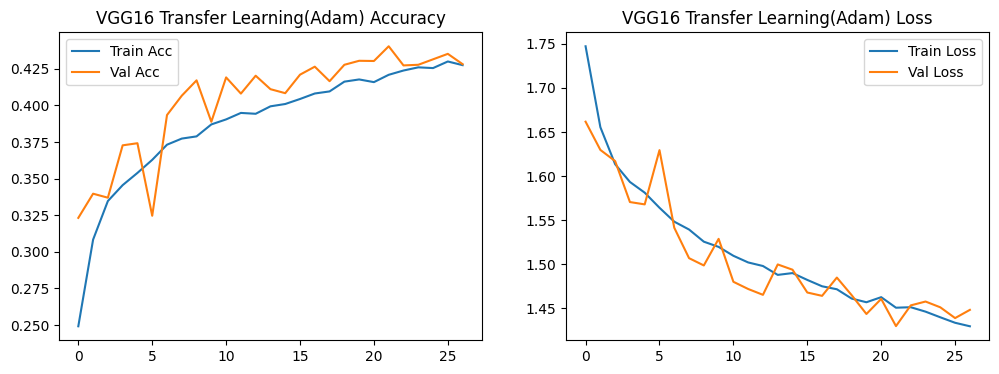

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title='Model'):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} Loss')
    plt.legend()
    plt.show()
plot_history(history_tl, 'VGG16 Transfer Learning(Adam)')

47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step
=== Classification Report (Transfer Learning) ===
              precision    recall  f1-score   support

       angry       0.42      0.29      0.34       300
        fear       0.23      0.10      0.14       188
       happy       0.45      0.62      0.52       300
     neutral       0.47      0.38      0.42       300
         sad       0.16      0.37      0.23       110
    surprise       0.63      0.63      0.63       300

    accuracy                           0.42      1498
   macro avg       0.39      0.40      0.38      1498
weighted avg       0.44      0.42      0.42      1498



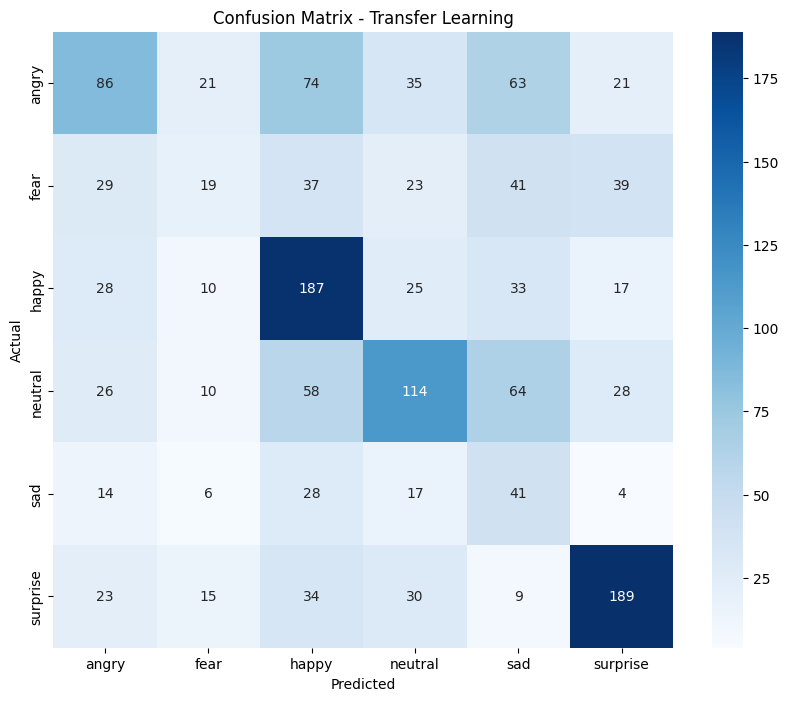

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Predictions
y_pred_tl = model_tl.predict(test_generator)
y_pred_labels_tl = np.argmax(y_pred_tl, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Classification Report
print("=== Classification Report (Transfer Learning) ===")
print(classification_report(y_true, y_pred_labels_tl, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_labels_tl)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.title("Confusion Matrix - Transfer Learning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


1. Loading and Adapting a Pre-Trained Model:
- Model Selection : VGG16
- Justification : VGG16 is model with pre-trained weights on ImageNet.
- Model Architecture : Added new layers for classification and uses pre trained weights from ImageNet to leverage learned features.
- Frozen Layers : The convolutional base is frozen to retain pre-trained
  features and to stop weights from being updated.

2. Model Training and Fine-Tuning:
- Training Strategy : Convolutional base is forzen and feature extraction is done.
- Input Size Handling : Images resized to 224x224 pixels.
- Output Layer Handling : Softmax activation is used and

3. Model Evaluation and Prediction:
- Test Accuracy : 0.4246
- Test Loss : 1.4339
- Confusion Matrix : Shows misclassifications, for the "fear" vs
  "sad", "neutral" vs sad and angry vs sad classes.
- Sample Predictions : Highlights area for improvements.